In [ ]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
# csv read
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영우_4기_딥러닝/dataset/ThoraricSurgery.csv')

In [ ]:
data.head()

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62,0.10
0,1,2,2.88,2.16,1,0,0,0,1,1,14.000,0,0,0,1,0,60,0
1,8,2,3.19,2.50,1,0,0,0,1,0,11.000,0,0,1,1,0,66,1
2,14,2,3.98,3.06,2,0,0,0,1,1,11.444,0,0,0,1,0,80,1
3,17,2,2.21,1.88,0,0,1,0,0,0,12.000,0,0,0,1,0,56,0
4,18,2,2.96,1.67,0,0,0,0,0,0,12.000,0,0,0,1,0,61,0


In [ ]:
data = data.values

In [ ]:
x = data[:,0:17]
y = data[:,17]

In [ ]:
type(x)
type(y)

numpy.ndarray

In [ ]:
# 전체 데이터에서 학습데이터와 테스트 데이터 구분
x_train1, x_test, y_train1, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.3)

In [ ]:
input_layer = tf.keras.layers.Input(shape=(17,))
x = tf.keras.layers.Dense(10, activation='sigmoid', kernel_initializer=tf.keras.initializers.he_normal())(input_layer) # he 초기화 방법
x = tf.keras.layers.Dense(10, activation='sigmoid', kernel_initializer=tf.keras.initializers.glorot_uniform)(x) # xavier초기화 방법
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                180       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.4)
metrics = tf.keras.metrics.binary_accuracy
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_valid, y_valid))

Epoch 1/100
27/27 [==============================] - 1s 10ms/step - loss: 0.4308 - binary_accuracy: 0.8473 - val_loss: 0.4459 - val_binary_accuracy: 0.8496
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4361 - binary_accuracy: 0.8473 - val_loss: 0.4255 - val_binary_accuracy: 0.8496
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4388 - binary_accuracy: 0.8473 - val_loss: 0.4298 - val_binary_accuracy: 0.8496
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4351 - binary_accuracy: 0.8473 - val_loss: 0.4266 - val_binary_accuracy: 0.8496
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4367 - binary_accuracy: 0.8473 - val_loss: 0.4376 - val_binary_accuracy: 0.8496
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4343 - binary_accuracy: 0.8473 - val_loss: 0.4305 - val_binary_accuracy: 0.8496
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - lo

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


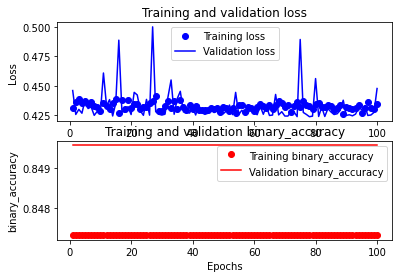

In [ ]:
## history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
rmse = history.history['binary_accuracy']
val_rmse = history.history['val_binary_accuracy']
epochs = range(1, len(rmse) + 1)
### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training binary_accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation binary_accuracy')
plt.title('Training and validation binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('binary_accuracy')
plt.legend()

In [ ]:
# 결과를 출력합니다.
print("-----")
print(model.evaluate(x_test, y_test))
print("\n Accuracy: %.4f" % (model.evaluate(x, y)[1]))

plt.show()

-----
3/3 [==============================] - 0s 4ms/step - loss: 0.4330 - binary_accuracy: 0.8617
[0.43296298384666443, 0.8617021441459656]


TypeError: ignored

In [ ]:
# 1. 데이터 불러오기
# 2. 데이터 확인하기
# 3. x,y 나누기
# 4. 전체 데이터에서 학습데이터와 테스터데이터(0.2) 구분
# 5. 딥러닝 설계  ---> kernel_initializer = tf.keras.initializers.he_normal(), tf.keras.initializers.glorot_uniform()
# 6. model.complie
# 7. model.fit
# 8. 그래프 결과 확인
# 9. test 정확도 확인

### NN_MNIST

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(x_train))

60000


In [ ]:
print(len(x_train))
print(len(y_train))
print(x_train.shape)
print(y_train.shape)

60000
60000
(60000, 28, 28)
(60000,)


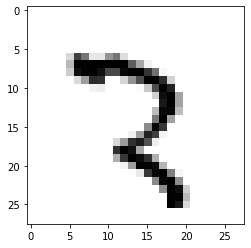

In [ ]:
plt.imshow(x_train[500], cmap=plt.cm.binary)

In [ ]:
print(y_train[500])

3


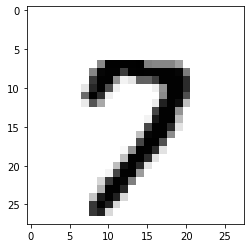

388 번째 이미지의 숫자는 바로  7 입니다.


In [ ]:
# index에 0에서 59999사이의 숫자를 지정해보세요.
index = 387
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print((index+1), "번째 이미지의 숫자는 바로 ", y_train[index],'입니다.')

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
import numpy as np
print('최소값:', np.min(x_train), '최대값:', np.max(x_train))

최소값: 0 최대값: 255


In [ ]:
# 정규화
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0
print('최소값:', np.min(x_train_norm), '최대값:', np.max(x_test_norm))

최소값: 0.0 최대값: 1.0


In [ ]:
x_train_norm.shape

(60000, 28, 28)

In [ ]:
# reshape 28 * 28 --> 784,1변환
x_train = x_train_norm.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test_norm.reshape(x_test.shape[0], 784).astype('float32')

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(len(model.layers))

3


In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1)

Epoch 1/10
270/270 [==============================] - 4s 14ms/step - loss: 0.2709 - accuracy: 0.9231 - val_loss: 0.1069 - val_accuracy: 0.9693
Epoch 2/10
270/270 [==============================] - 4s 13ms/step - loss: 0.0953 - accuracy: 0.9723 - val_loss: 0.0795 - val_accuracy: 0.9767
Epoch 3/10
270/270 [==============================] - 4s 13ms/step - loss: 0.0607 - accuracy: 0.9815 - val_loss: 0.0672 - val_accuracy: 0.9793
Epoch 4/10
270/270 [==============================] - 4s 13ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0782 - val_accuracy: 0.9792
Epoch 5/10
270/270 [==============================] - 4s 13ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0700 - val_accuracy: 0.9810
Epoch 6/10
270/270 [==============================] - 4s 13ms/step - loss: 0.0207 - accuracy: 0.9941 - val_loss: 0.0647 - val_accuracy: 0.9813
Epoch 7/10
270/270 [==============================] - 4s 13ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0749 - val_accuracy: 0.9793

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('test loss : {}'.format(test_loss))
print('test_accuracy: {}'.format(test_accuracy))

313/313 - 1s - loss: 0.0729 - accuracy: 0.9809
test loss : 0.072850301861763
test_accuracy: 0.98089998960495


In [ ]:
# 예측

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result,axis=1)

In [ ]:
idx = 0
print('model.predict() 결과 :',predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ',predicted_labels[idx])
print('실제 데이터의 라벨 :',y_test[idx])

model.predict() 결과 : [2.3273811e-10 1.5531204e-09 1.7318918e-08 2.4015078e-06 9.0095046e-14
 1.0273348e-10 1.7007154e-15 9.9999738e-01 7.3393569e-11 2.2356235e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
x_test.shape

In [ ]:
x_test_result = x_test.reshape(x_test.shape[0], 28, 28)

In [ ]:
x_test_result.shape

(10000, 28, 28)

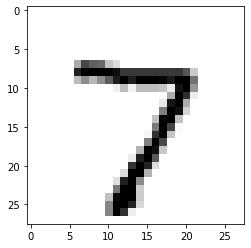

In [ ]:
plt.imshow(x_test_result[idx], cmap=plt.cm.binary)
plt.show()

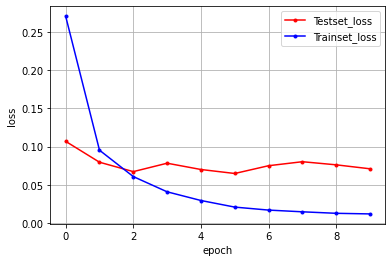

In [ ]:

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [23]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

## TEST할 이미지 선택
test_image = X_test[290]

## NN 이미로 이차원으로 데이터를 넣어주어야 해서 1x784 형태로 reshape
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [50]:
## 모델 불러오기
input_Layer = tf.keras.layers.Input(shape = (784,))
x = tf.keras.layers.Dense(256, activation='relu')(input_Layer)
x = tf.keras.layers.Dense(512, activation='relu')(x)
out_Layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_Layer], outputs = [out_Layer])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


In [51]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(lr = 0.001)

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [52]:
# 불러온 모델로 값 예측하기.
Y_prediction = model.predict(test_image_reshape)

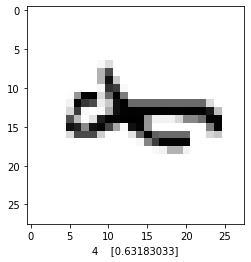

In [60]:
index=np.argmax(Y_prediction)
vlaue=Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel(str(index)+"    " +str(vlaue))
plt.show()

In [25]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [61]:
## 이미지 회전 시키기.
M= cv2.getRotationMatrix2D((28/2, 28/2),90,1) # 매트릭스 생성
test_image = cv2.warpAffine(X_train[240], M, (28, 28))

In [62]:
test_image_reshape =test_image.reshape(1, 784).astype('float64')

In [65]:
Y_prediction = model.predict(test_image_reshape)
print(Y_prediction)

[[0.0000000e+00 3.6700293e-01 0.0000000e+00 0.0000000e+00 6.3183033e-01
  2.4353878e-13 1.7438046e-11 1.1666649e-03 2.9383154e-10 0.0000000e+00]]


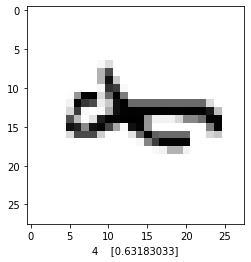

In [64]:
index=np.argmax(Y_prediction)
value=Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel(str(index)+"    " +str(value))
plt.show()